## Group 7
## Big Data Group Project

### Contributors:
- 29233798: Joel Shien Yee Chin [Joel]
- 18435688: Tim O'Doherty [Tim]
- 22606127: Sean Whitehead [Sean]
- 29650437: Lin Bai [Lin]


### Phase 2: Cleansing and Reshaping

This notebook is used for co-developing of codes required to wrangle the home credit risk dataset.

Please use this notebook as the live version and download local copies as you require.

If you have picked up a specific section, please comment your name to the code cell so that we can work on other sections.

Helpful link for Dataframes in Scala:
- https://docs.databricks.com/spark/latest/dataframes-datasets/introduction-to-dataframes-scala.html#work-with-dataframes
- https://spark.apache.org/docs/1.5.0/api/java/overview-summary.html
- https://spark.apache.org/docs/2.2.0/sql-programming-guide.html
- https://www.tutorialspoint.com/scala/
- http://allaboutscala.com/big-data/spark/#dataframe-select-columns

Insert libraries into the cell below:

In [1]:
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types._
import org.apache.spark.sql._
import org.apache.hadoop.io.LongWritable
import org.apache.hadoop.io.Text
import org.apache.hadoop.conf.Configuration
import org.apache.hadoop.mapreduce.lib.input.TextInputFormat
import org.apache.spark.sql.functions.{sum, col}
import org.apache.spark.sql.functions.{col, count, when}
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types.IntegerType

Intitializing Scala interpreter ...

Spark Web UI available at http://9fc3851d2937:4040
SparkContext available as 'sc' (version = 2.4.3, master = local[*], app id = local-1559819645286)
SparkSession available as 'spark'


import org.apache.spark.sql.functions._
import org.apache.spark.sql.types._
import org.apache.spark.sql._
import org.apache.hadoop.io.LongWritable
import org.apache.hadoop.io.Text
import org.apache.hadoop.conf.Configuration
import org.apache.hadoop.mapreduce.lib.input.TextInputFormat
import org.apache.spark.sql.functions.{sum, col}
import org.apache.spark.sql.functions.{col, count, when}
import org.apache.spark.sql.functions._
import org.apache.spark.sql.types.IntegerType


Insert code for data loading below:

Download zip from GDrive and extract to location where you are running notebook for below to run

In [2]:
//read in csv [Sean]
val creditRiskdf1 = spark.read.option("header","true").csv("m_train_small.csv")

creditRiskdf1: org.apache.spark.sql.DataFrame = [EXT_SOURCE_1: string, EXT_SOURCE_2: string ... 359 more fields]


In [ ]:
//take a look at features in dataset (...361 of them) [Sean]
creditRiskdf1.printSchema()

In [3]:
//string array of features to pass through EDA functions [Sean]
val creditRiskFeatures = creditRiskdf1.columns

creditRiskFeatures: Array[String] = Array(EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, client_installments_AMT_PAYMENT_min_sum, DAYS_BIRTH, AMT_CREDIT, AMT_ANNUITY, DAYS_EMPLOYED, bureau_DAYS_CREDIT_ENDDATE_max, bureau_DAYS_CREDIT_max, DAYS_ID_PUBLISH, bureau_AMT_CREDIT_MAX_OVERDUE_mean, bureau_DAYS_ENDDATE_FACT_max, bureau_AMT_CREDIT_SUM_DEBT_mean, OWN_CAR_AGE, previous_loans_CNT_PAYMENT_mean, client_cash_CNT_INSTALMENT_FUTURE_min_max, previous_loans_SELLERPLACE_AREA_max, DAYS_LAST_PHONE_CHANGE, bureau_AMT_CREDIT_SUM_max, bureau_AMT_CREDIT_SUM_mean, DAYS_REGISTRATION, client_installments_DAYS_INSTALMENT_max_max, previous_loans_AMT_DOWN_PAYMENT_max, CODE_GENDER_F, REGION_POPULATION_RELATIVE, client_cash_CNT_INSTALMENT_max_mean, bureau_DAYS_CREDIT_UPDATE_max, bureau_AMT_CREDIT_SUM_sum, clie...

The next three cells run a box plot for a single feature, to be included in an update of phase 2 notebook.

In [4]:
!pip install pandas
!pip install matplotlib

In [17]:
creditRiskdf1.select(creditRiskFeatures(9)).createOrReplaceTempView("dfBox")

       bureau_DAYS_CREDIT_max
count           263491.000000
mean              -489.297817
std                537.574145
min              -2922.000000
25%               -620.000000
50%               -300.000000
75%               -143.000000
max                  0.000000


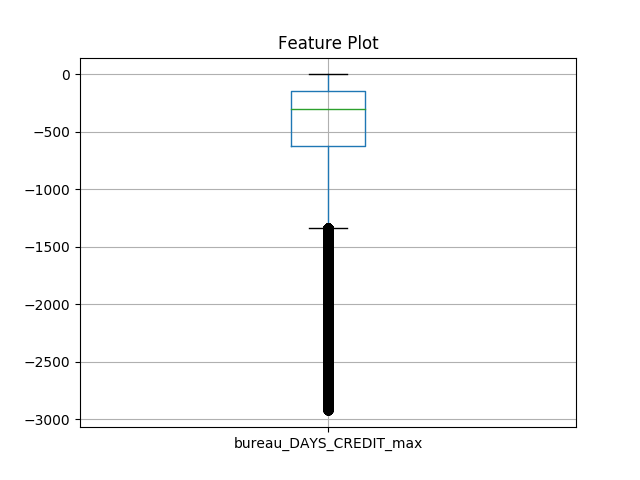

In [18]:
%%python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pyData = spark.sql("select int(*) from dfBox ").toPandas()
print(pyData.describe())
from IPython.display import Image
import tempfile
plt.clf()
pyData.boxplot()
plt.title("Feature Plot")
with tempfile.NamedTemporaryFile(suffix=".png") as fo:
    plt.savefig(fo.name)
    retval = Image(filename=fo.name)
